# Project: No-show medical appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> The dataset collects information from 100k medical appointments from Brazil, and focus mainly on whether patients show up for their appointment, with other rows of characteristics of the patients.

> This report will focus on A) whether scolarship plays a role; B) relationship between show-up and Age/Gender; and C) whether length of time between scheduled and appointment day have any indication on show-up.

In [1]:
# Import statements for packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as date

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Read csv and print few lines of data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Check the info and there is no missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#Check for duplicate data
sum(df.duplicated())

0

In [5]:
#Understanding the data samples - descriptive statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


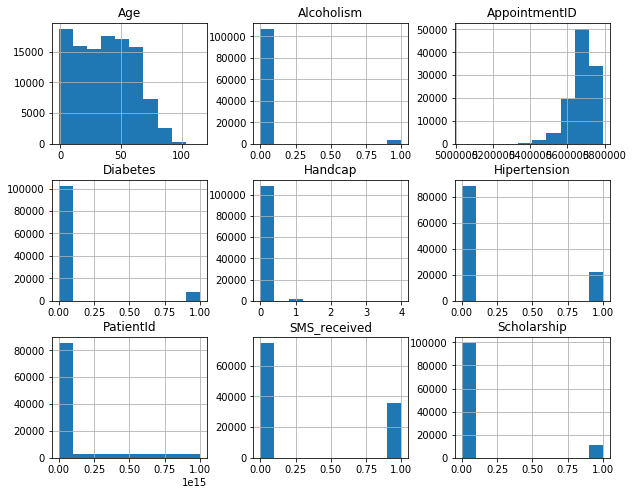

In [6]:
#Understanding the data samples - general visualization of results
df.hist(figsize=(10,8));

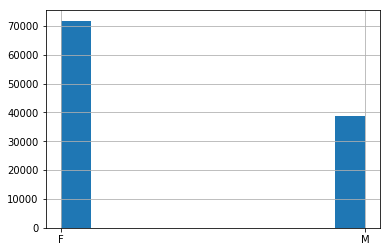

In [7]:
#Gender distribution
df['Gender'].hist();

In [8]:
#Handcap
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [9]:
#Check that Scheduled Day is not more than Appointment Day
sum(df.AppointmentDay > df.ScheduledDay)


71959

> ## Observations:
- Drop unnecessary columns
- Age has negative values
- Handcap has values more than 1, which should only be true (1) and false (0)
- Day need to convert to datetime for analysis purpose
- Some Scheduled Day is more than Appointment Day

### Data Cleaning (Replace this with more specific notes!)

In [10]:
#Drop unnecessary columns - PatientID, AppointmentID
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

In [11]:
#Amend -ve Age
df.query('Age < 0').index
#Drop -ve Age dataset
df.drop(df.query('Age < 0').index, inplace=True)
#Check no -ve age
df.query('Age < 0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [12]:
#Amend Handcap to figures of True (1) and False (0)
df.replace({'Handcap': {2:1, 3:1, 4:1}},inplace=True)
df['Handcap'].value_counts() #Check conversion success

0    108285
1      2241
Name: Handcap, dtype: int64

In [ ]:
#Change ScheduledDay and AppointmentDay as datetime format
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['ScheduledDay']= df['ScheduledDay'].dt.strftime('%Y-%m-%d')
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])
df.info() #Check conversion success
df.head()

In [ ]:
#Create difference in days
df['diff_days'] = (df.AppointmentDay - df.ScheduledDay) / np.timedelta64(1,'D')
df['diff_days'].describe()
print(len(df.query('diff_days < 0')))
df.query('diff_days < 0')

In [ ]:
#Most likely Scheduled Days > Appointment Days are system errors; So drop
df.drop(df.query('diff_days < 0').index,inplace=True)
df.shape

<a id='eda'></a>
## Exploratory Data Analysis

### A) Is having scholarship a good indication of whether patient will show up on appointment?

In [ ]:
#Create show/no-show% based on scholarship
Y_scholar = df.query('Scholarship == 1')['No-show'].value_counts().astype(float)
N_scholar = df.query('Scholarship == 0')['No-show'].value_counts().astype(float)
Y_scholar['No'] = (Y_scholar['No']/sum(Y_scholar))
Y_scholar['Yes'] = (1-Y_scholar['No'])
print(Y_scholar)
N_scholar['No'] = (N_scholar['No']/sum(N_scholar))
N_scholar['Yes'] = (1-N_scholar['No'])
print(N_scholar)
scholar_show = [Y_scholar['No'], N_scholar['No']]
scholar_noshow = [Y_scholar['Yes'], N_scholar['Yes']]

In [ ]:
# Explore relationship in graph form
labels = ['Yes','No']
width = 0.8

plt.figure(figsize=(5, 5))
fig, ax = plt.subplots()

ax.bar(labels,scholar_show, width, label='Show')
ax.bar(labels,scholar_noshow, width, bottom=scholar_show, label='No Show')

ax.set_xlabel('Scholarship')
ax.set_title('Scholarship and No-show')
ax.legend();

> ## Observation: 
- Having or not having scholarship (enrolled in Brasilian welfare program), both has more show than no-show. However, it seems having a scholarship has slightly more % of people not showing up for appointment.

### B) Does Age/Gender have any indication on show-up?

In [ ]:
# Age Range
df.Age.describe()

In [ ]:
bins= [0,18,37,55,115]
labels = ['0-18','19-37','38-55','Over 56']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print(df.head())

In [ ]:
#Graph representation of Age/Gender analysis
df['no_show'] = np.where(df['No-show']=="Yes", 1, 0)
df.groupby(['AgeGroup','Gender']).no_show.mean().unstack().plot(kind='bar', alpha=.5)
plt.title('Age/Gender on No-show')
plt.xticks(rotation=0);

>## Observation
- Female in general seems to no-show more than men in the dataset
- Older people seems to have less no-show starting from Age 19.

### C) Does lengh of time between scheduled and appointment day have any indication on show-up?

In [ ]:
#Info about diff btw scheduled and appointment day
df.diff_days.describe()

In [ ]:
#Plot graphs on the days difference with no-show
df_difd_ns = df.query('no_show == 1')['diff_days']
plt.subplot(1,2,1)
df_difd_ns.hist(alpha=0.3,label='no-show')
plt.xlabel('Days Diff')
plt.legend()

df_difd_s = df.query('no_show == 0')['diff_days']
plt.subplot(1,2,2)
df_difd_s.hist(alpha=0.3,label='show', color='orange')
plt.xlabel('Days Diff')
plt.tight_layout()
plt.legend()

plt.title('Scheduled & Appointment time diff with no-show up', loc='right');

In [ ]:
#Plot graphs on the days difference with no-show
df.groupby(['diff_days']).no_show.mean().plot(marker='x')


plt.title('Scheduled & Appointment time diff with no-show up', loc='right');

>## Observation
- It seems that more difference in scheduled days/appointment days, it has more probability of no-show
- However, in general, there is more people booking with less days difference

<a id='conclusions'></a>
## Conclusions

>- Based on the above, having a scholarship, female, older people, and more difference in scheduled days/appointment days may have more relationship with no-show.
- Although mean has already been considered in the above report, as the sample was skewed, the relationship may be biased e.g. > 90 diff for scheduled/appointment days only has a few data where they are all in one-direction which may create bias results.
- There are also other limitations as sample size is only 100k, which is only 0.05% of the total population of Brazil (210m in 2019); Also, one patient can have multiple appointments that might skew the gender/age population
- More data and more testing is needed to derived a definite conclusion

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])